In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Load the data into a train and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes) using softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step


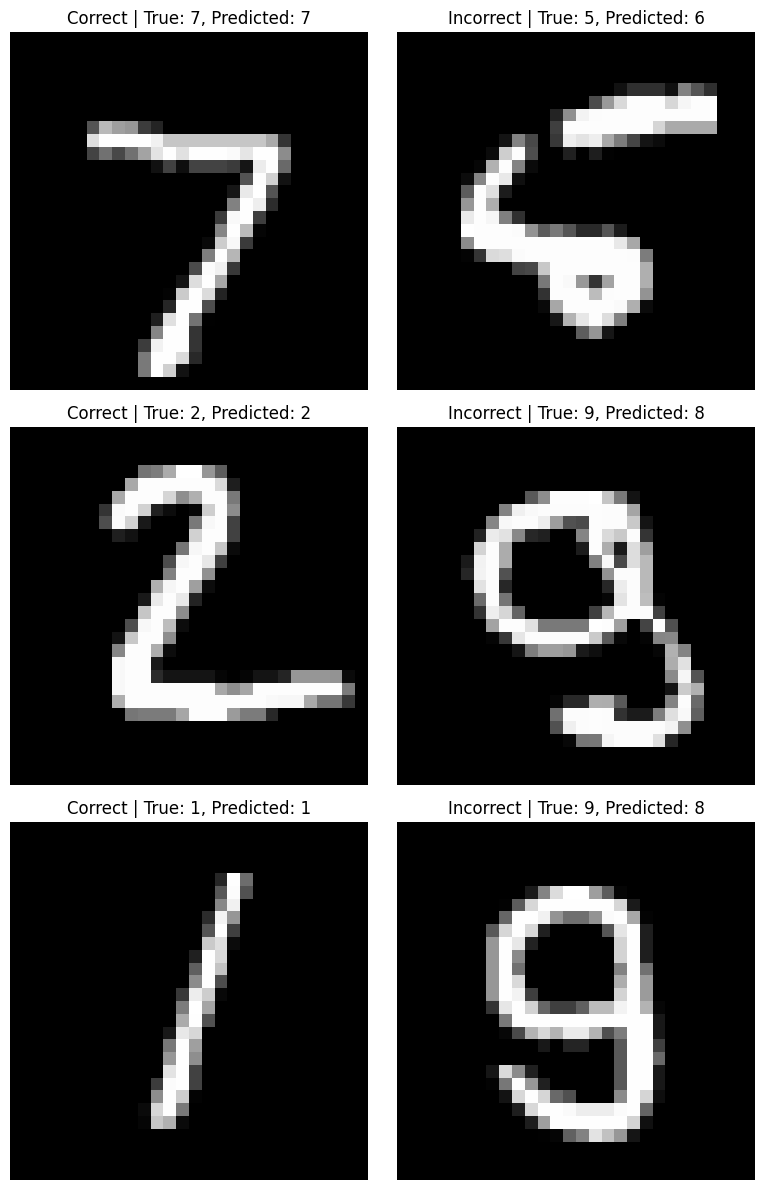

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Find indices of correctly and incorrectly predicted samples
correct_indices = np.where(predicted_labels == y_test)[0]
incorrect_indices = np.where(predicted_labels != y_test)[0]

# Create a figure with subplots for correct and incorrect predictions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))

# Display correctly predicted samples on the left column
for i in range(3):
    idx = correct_indices[i]
    axes[i, 0].imshow(x_test[idx], cmap='gray')
    axes[i, 0].set_title(f"Correct | True: {y_test[idx]}, Predicted: {predicted_labels[idx]}")
    axes[i, 0].axis('off')

# Display incorrectly predicted samples on the right column
for i in range(3):
    idx = incorrect_indices[i]
    axes[i, 1].imshow(x_test[idx], cmap='gray')
    axes[i, 1].set_title(f"Incorrect | True: {y_test[idx]}, Predicted: {predicted_labels[idx]}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
